### Import libraries

In [48]:
# General
import pandas as pd
import numpy as np
import json

# Scraping
import praw

# Text processing
from collections import Counter

# Visualisation
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud.wordcloud import WordCloud, STOPWORDS

### Scraping comments using <a href=https://praw.readthedocs.io/en/stable/tutorials/comments.html#extracting-comments>PRAW</a>

In [21]:
# Load configuration
with open("config.json", "r") as config_file:
    config = json.load(config_file)

client_id = config["client_id"]
client_secret = config["client_secret"]

In [14]:
# Provide authentication. You can scrape comments with just read-only access, so there is no need to provide account credentials (username & password)
reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    password='',
    username='',
    user_agent='YOURUSERAGENT',
    check_for_async=False
)

In [18]:
# Create a subreddit instance
subreddit = reddit.subreddit('gunners')

print(subreddit.display_name)
print(subreddit.title)

gunners
 The Arsenal on Reddit


In [ ]:
# Create a submission instance
submission = reddit.submission('1bdyge4')
submission.comments.list()[1].__dict__

In [37]:
#create empty list
comments_list = []

# loop through comment objects and append attributes to list
submission.comments.replace_more(limit=None)
for comment in submission.comments.list():
  comments_list.append([comment.score, comment.author, comment.body])

# convert list to dataframe
df = pd.DataFrame(comments_list)

# rename columns
df.columns = ['score', 'author', 'content']

In [39]:
df.head(10)

,score,author,content
0,1510,Meu_14,Fair play thats pretty god dammed impressive.
1,866,slightlyhigh7,And he’s still pretty fuckin good.. I didn’t e...
2,609,micsare4swingng,This is such a cool set of photos. Everything ...
3,290,Francis-c92,With Odegaard as well\n\nhttps://preview.redd....
4,327,shekdown,He was so good in both legs. Absolutely incred...
5,182,AfroPanther,Great player. Also despite his reputation he s...
6,154,remote_crocodile,That's a mad photo
7,105,pp1911,41 years old and he played 120 minutes in UCL ...
8,92,Mozilla11,Amazing photo. I hope he sees this and realize...
9,47,roosterman22,Can’t tell by looking only at Pepe which is th...


In [40]:
print(str(len(df))+' comments in post.')

195 comments in post.


### Text Processing

In [47]:
# Split comments into a list of words
column = df['content']
words = []
for sentence in column:
    sentence_words = sentence.lower().split()
    words.extend(sentence_words)

# Define stop words
stop_words = set(STOPWORDS)
words = [word for word in words if word not in stop_words]

In [51]:
# Get a dataframe of common words in the comment section.
word_counts = Counter(words)
word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count'])
word_counts_df = word_counts_df.sort_values('count', ascending=False)
word_counts_df

,count
pepe,30
one,16
player,16
still,14
old,12
...,...
side,1
effect,1
fountain,1
youth,1


### Word Cloud

In [ ]:
# Add additional words to ignore
stop_words.add('u')
stop_words.add('s')
stop_words.add('game')
stop_words.add('team')
stop_words.add('us')

In [72]:
# Set word cloud silhouette
mask = np.array(Image.open(r'images\arsenal_badge.png'))

# Put all comments into string
word_string = ' '.join(df['content']).lower()

# Define wordcloud object properties
wc = WordCloud(background_color='#282828',
               stopwords=stop_words,
               max_words=250,max_font_size=250,
               width=3000,height=3000,
               mask=mask,
               random_state=7)

# Generate wordcloud object
wc.generate(word_string)

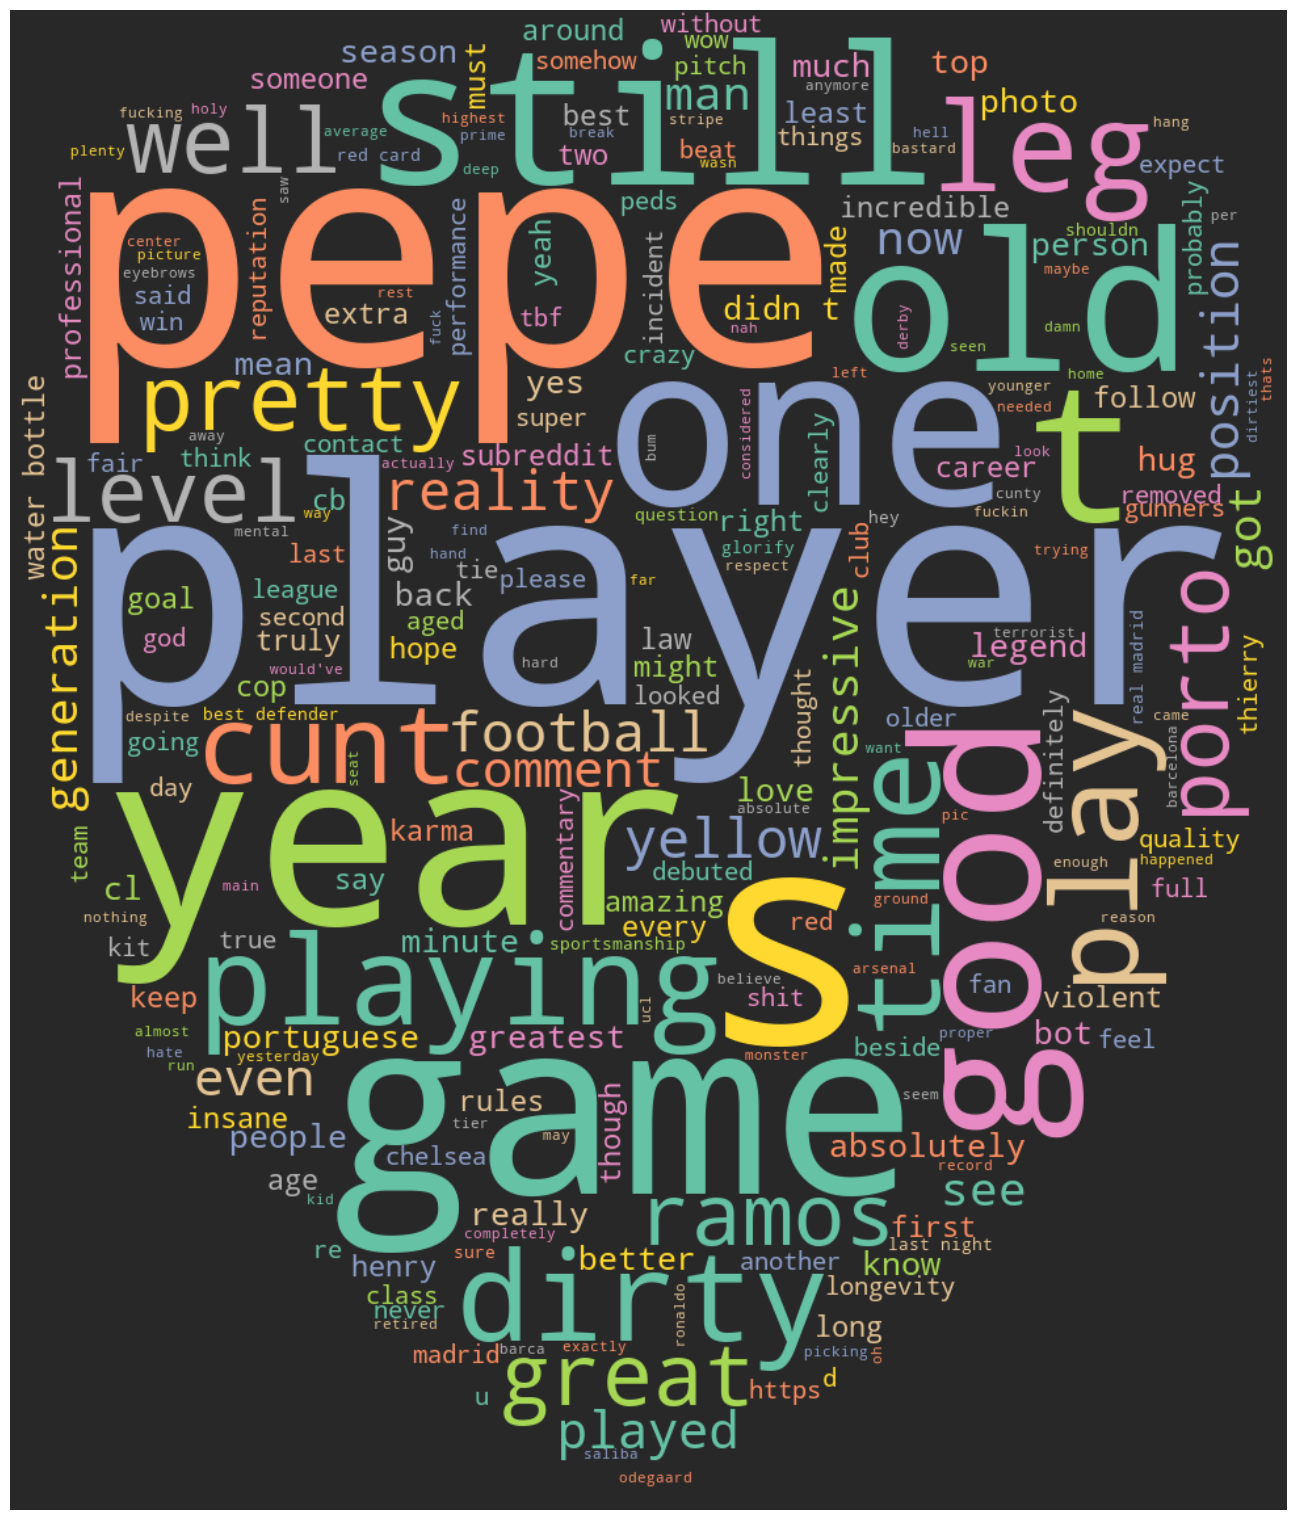

In [63]:
# display wordcloud object
plt.figure(figsize=(15,15))
plt.imshow(wc.recolor(colormap='Set2',random_state=7),interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)